In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
from scipy.io import mmread
import numpy as np
import anndata as ad
import os
import igraph
import leidenalg
from collections import defaultdict
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
adata = sc.read_h5ad("HTAPP_filtered.h5ad")
adata

AnnData object with n_obs × n_vars = 279730 × 31261
    obs: 'patient_id', 'type', 'age', 'n_genes'
    var: 'n_cells'
    uns: 'log1p'

extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


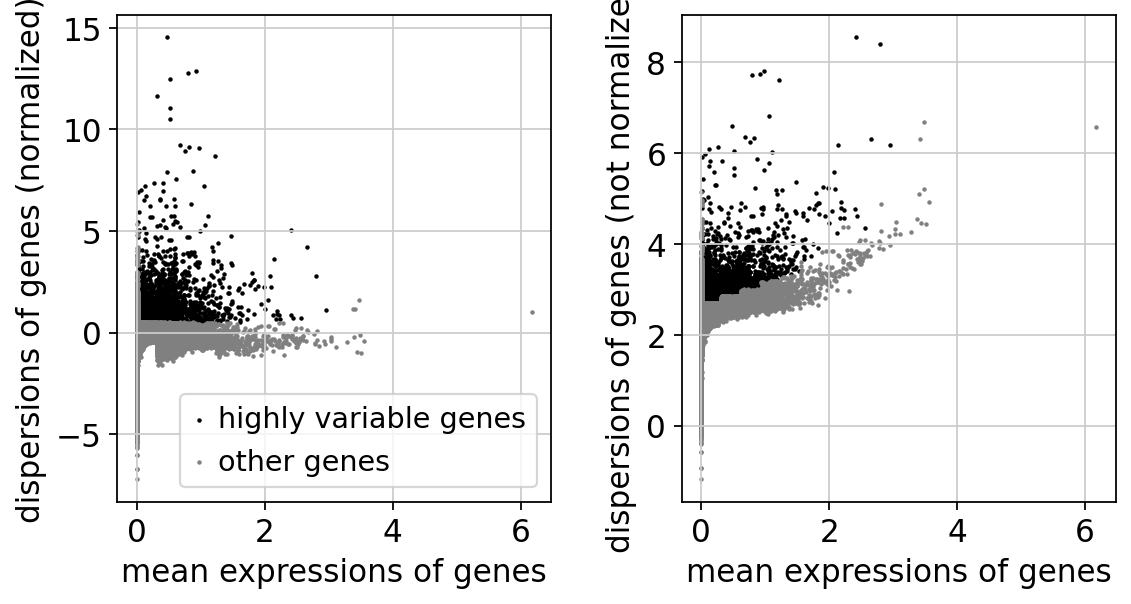

View of AnnData object with n_obs × n_vars = 279730 × 4985
    obs: 'patient_id', 'type', 'age', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [9]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]
adata

In [10]:
sc.tl.pca(adata, n_comps=50)
sc.pp.neighbors(adata)
sc.tl.louvain(adata, key_added="louvain")
sc.tl.umap(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:24)
computing neighbors
    using 'X_pca' with n_pcs = 50


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:44)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 53 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:01:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:04:06)


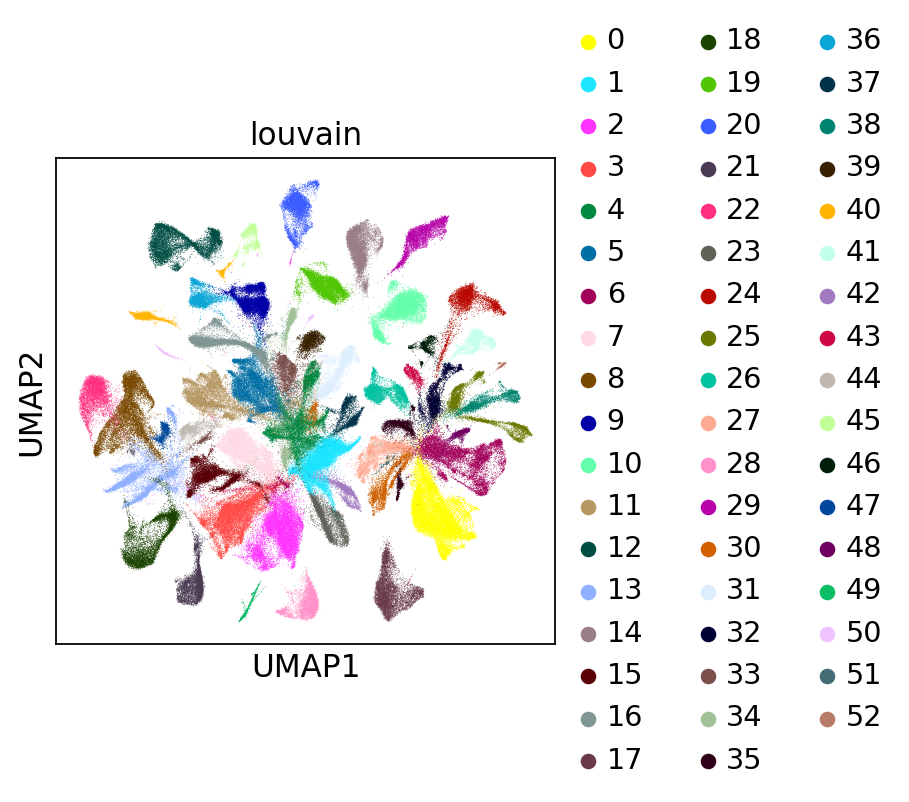

In [12]:
sc.pl.umap(adata, color=['louvain'])

In [13]:
adata.write("HTAPP_analysis.h5ad")